<a href="https://colab.research.google.com/github/ramy-arab/Brain-Tumor-Detection/blob/main/Brain_Tumor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings("ignore")


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math
import shutil
import glob

In [3]:
!git clone https://github.com/ramy-arab/Brain-Tumor-Detection.git

Cloning into 'Brain-Tumor-Detection'...
remote: Enumerating objects: 4060, done.
remote: Total 4060 (delta 0), reused 0 (delta 0), pack-reused 4060 (from 1)
Receiving objects: 100% (4060/4060), 92.20 MiB | 16.44 MiB/s, done.
Resolving deltas: 100% (2/2), done.
Updating files: 100% (4600/4600), done.


In [4]:
#cout the number of images in respective classes 0: brain tumor, 1: healthey
ROOT_DIR = "/content/Brain-Tumor-Detection"
number_of_images = {}
for dir in os.listdir(ROOT_DIR):
    number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))
number_of_images.items()
print(number_of_images)

{'.git': 11, 'Healthy': 2087, 'Brain Tumor': 2513}


####Split data
70% : training
15% : testing
15% : validation

In [26]:
import os
import numpy as np
import math
import shutil

# Assume number_of_images is a dictionary with the number of images in each directory
# Example: number_of_images = {"Brain Tumor": 100, "Healthy": 100}

def dataFolder(p, split):
    # Delete the folder if it exists
    if os.path.exists("./"+p):
        shutil.rmtree("./"+p)
        print(f"Deleted existing {p} folder.")



# Example usage:
dataFolder("train", 0.7)
dataFolder("val", 0.15)
dataFolder("test", 0.15)


Deleted existing train folder.
Deleted existing val folder.
Deleted existing test folder.
Deleted existing Brain-Tumor-Detection folder.


In [20]:
def dataFolder(p, split):
  #create a train folder
  if not os.path.exists("./"+p):
      os.mkdir("./"+p)

      for dir in os.listdir(ROOT_DIR):
          os.makedirs( "./"+p+"/"+dir)

          for img in np.random.choice(a=os.listdir(os.path.join(ROOT_DIR, dir)), size = (math.floor(split*number_of_images[dir])-5), replace = False):
              O = os.path.join(ROOT_DIR, dir, img)
              D = os.path.join("./"+p,dir)
              shutil.copy(O, D)
              os.remove(O)
  else:
      print(f"{p} folder exists")

Deleted existing output folder.


In [5]:
import os
import shutil
import numpy as np
import math

# Define the root directory of your dataset
ROOT_DIR = '/content/Brain-Tumor-Detection'  # Change this to your dataset path

# Count the number of images in each category (excluding hidden directories)
number_of_images = {
    dir: len(os.listdir(os.path.join(ROOT_DIR, dir)))
    for dir in os.listdir(ROOT_DIR)
    if os.path.isdir(os.path.join(ROOT_DIR, dir)) and not dir.startswith('.')
}

def dataFolder(p, split):
    # Create the train/val/test folder if it does not exist
    if not os.path.exists("./"+p):
        os.mkdir("./"+p)

        for dir in os.listdir(ROOT_DIR):
            dir_path = os.path.join(ROOT_DIR, dir)

            # Check if it's a directory and not a hidden directory like .git
            if not os.path.isdir(dir_path) or dir.startswith('.'):
                continue

            # Create category-specific folders inside the split folder
            os.makedirs("./"+p+"/"+dir, exist_ok=True)

            # Number of images to move, ensuring it's non-negative
            num_images_to_select = math.floor(split * number_of_images[dir])
            if num_images_to_select < 5:
                print(f"Not enough images in {dir} to move for {p} set. Need at least 5 to proceed.")
                continue  # Skip if not enough images

            # Randomly select images to move
            images_in_dir = os.listdir(dir_path)
            selected_images = np.random.choice(images_in_dir, size=num_images_to_select, replace=False)

            for img in selected_images:
                src = os.path.join(dir_path, img)
                dest = os.path.join("./"+p, dir)

                if os.path.isfile(src):
                    shutil.copy(src, dest)
                    os.remove(src)
            print(f"Moved {num_images_to_select} images from {dir} to {p} set.")
    else:
        print(f"{p} folder already exists.")

# Example usage:
dataFolder("train", 0.7)  # 70% of images for training
dataFolder("val", 0.15)   # 15% of images for validation
dataFolder("test", 0.15)  # 15% of images for testing


Moved 1460 images from Healthy to train set.
Moved 1759 images from Brain Tumor to train set.
Moved 313 images from Healthy to val set.
Moved 376 images from Brain Tumor to val set.
Moved 313 images from Healthy to test set.
Moved 376 images from Brain Tumor to test set.


###Model Building

In [6]:
!pip install keras tensorflow


In [7]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, GlobalAvgPool2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [8]:
import tensorflow as tf
print(tf.__version__)


2.17.0


In [9]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, GlobalAvgPool2D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf


In [10]:
# CNN Model

model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(224,224,3)))

model.add(Conv2D(filters=36, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=1, activation='sigmoid'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 36)        │           5,220 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 36)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 108, 108, 64)        │          20,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       5,537,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,638,245 (21.51 MB)

 Trainable params: 5,638,245 (21.51 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(optimizer='adam', loss=tf.keras.losses.binary_crossentropy, metrics=['accuracy'])

###Preparing our data using Data Generator

In [13]:
def preprocessingImages1(path):
  """
  input: Path
  output: Preprocessed images
  """
  image_data = ImageDataGenerator(
      rescale = 1/255,
      shear_range = 0.2,
      zoom_range = 0.2,
      horizontal_flip = True
  ) # data augmentation
  image = image_data.flow_from_directory(
      directory = path,
      target_size = (224,224),
      batch_size = 32,
      class_mode = 'binary'
  )
  return image

In [14]:
path = "/content/train"
train_data = preprocessingImages1(path)

Found 3219 images belonging to 2 classes.


In [15]:
def preprocessingImages2(path):
  """
  input: Path
  output: Preprocessed images
  """
  image_data = ImageDataGenerator(rescale = 1/255)
  image = image_data.flow_from_directory(
      directory = path,
      target_size = (224,224),
      batch_size = 32,
      class_mode = 'binary'
  )
  return image

In [16]:
path = "/content/test"
test_data = preprocessingImages2(path)

Found 689 images belonging to 2 classes.


In [17]:
path = "/content/val"
val_data = preprocessingImages2(path)

Found 689 images belonging to 2 classes.


In [19]:
# Early stopping and model chek point

from keras.callbacks import EarlyStopping, ModelCheckpoint

#early stopping

es = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=6, verbose=1, mode="auto")

#model check point
mc = ModelCheckpoint(filepath="./best_model.keras",
                     monitor='val_accuracy',
                     verbose=1,
                     save_best_only=True,
                     mode='auto')

# puting call back in a list
cd = [es, mc]

###Model Training

In [26]:
hs = model.fit(train_data,
               steps_per_epoch=8,
               epochs=30,
               verbose=1,
               validation_data=val_data,  # Ensure you have validation data
               callbacks=[mc])


Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step - accuracy: 0.7789 - loss: 0.4898
Epoch 1: val_accuracy improved from -inf to 0.85922, saving model to ./best_model.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.7802 - loss: 0.4878 - val_accuracy: 0.8592 - val_loss: 0.3798
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step - accuracy: 0.7799 - loss: 0.4459
Epoch 2: val_accuracy did not improve from 0.85922
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 745ms/step - accuracy: 0.7792 - loss: 0.4482 - val_accuracy: 0.8389 - val_loss: 0.3789
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step - accuracy: 0.8074 - loss: 0.4079
Epoch 3: val_accuracy did not improve from 0.85922
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 581ms/step - accuracy: 0.8075 - loss: 0.4086 - val_accuracy: 0.8084 - val_loss: 0.3966
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - accuracy: 0.8177 - loss: 0.3974
Epoch 4: val_accuracy did not improve from 0.85922
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 520ms/step - accuracy: 0.8154 - loss: 0.4037 - val_a

In [27]:
# Model Graphical Interpretation

h= hs.history
h.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

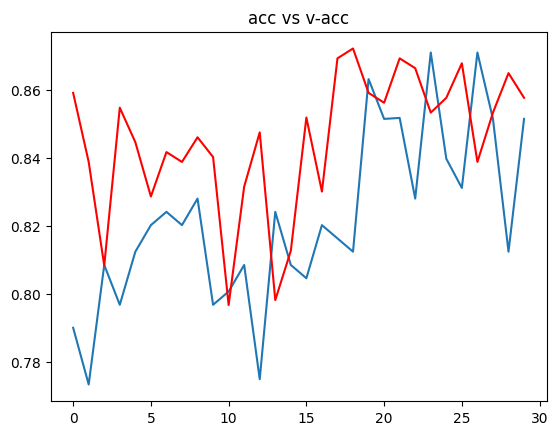

In [28]:
import matplotlib.pyplot as plt
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c="red")
plt.title("acc vs v-acc")
plt.show()

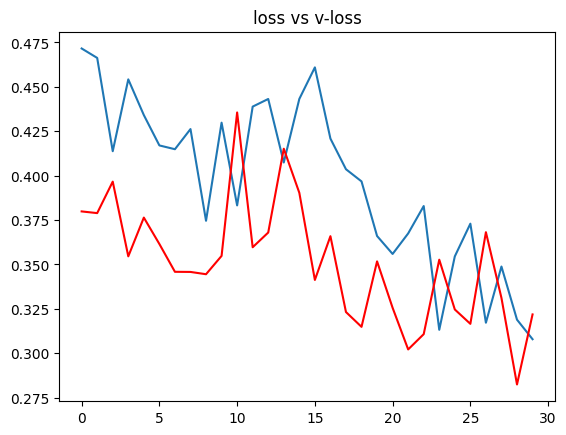

In [29]:
import matplotlib.pyplot as plt
plt.plot(h['loss'])
plt.plot(h['val_loss'], c="red")
plt.title("loss vs v-loss")
plt.show()

In [31]:
from keras.models import load_model
model = load_model("/content/best_model.keras")

# Model Accuracy

In [33]:

# Evaluate the model using the test data
loss, accuracy = model.evaluate(test_data)  # or replace with your test generator
print(f"Our model accuracy is {accuracy * 100:.2f} %")


22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.8580 - loss: 0.3135
Our model accuracy is 85.34 %


In [35]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array


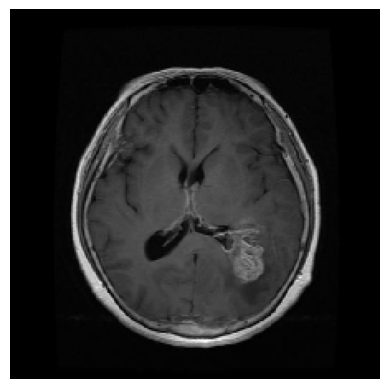

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
The MRI is having Tumor


In [56]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, img_to_array

# Load and preprocess the image
path = "/content/train/Brain Tumor/Cancer (10).jpg"
img = load_img(path, target_size=(224, 224))
input_arr = img_to_array(img) / 255.0  # Normalize the image

# Display the image
plt.imshow(input_arr)
plt.axis('off')  # Hide axis
plt.show()

# Expand dimensions to match model input shape
input_arr = np.expand_dims(input_arr, axis=0)

# Make a prediction
predictions = model.predict(input_arr)  # Replace 'model' with your actual model variable
pred = np.argmax(predictions, axis=1)[0]  # Get the predicted class index

# Interpret the prediction
if pred == 0:
    print("The MRI is having Tumor")
else:
    print("Healthy")


In [45]:
print("Predicted probabilities:", predictions)


Predicted probabilities: [[0.98946583]]


In [46]:
train_data.class_indices

{'Brain Tumor': 0, 'Healthy': 1}